In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
# Parameters
l = 1.6  # L
dr = 0.15  # Distance between ears
theta = (18 / 180) * np.pi  # Half the speaker span
l1 = np.sqrt(l**2 + (dr / 2)**2 - (dr * l * np.sin(theta / 2)))  # L1
l2 = np.sqrt(l**2 + (dr / 2)**2 + (dr * l * np.sin(theta / 2)))  # L2
g = l1 / l2  # g
cs = 340.3  # Speed of sound
dl = abs(l2 - l1)  # Distance difference
tc = dl / cs  # Time delay
tc = 65e-6  # Time delay for a normal listening room
g = 0.985

In [3]:
# Frequency and omega
f = np.arange(1, 24001, 1)
w = 2 * np.pi * f

$$
\begin{align}
S^{[P]}_{\text{si}_{||}}(\omega) &= |H_{LL}(i \omega)| = |H_{RR}(i \omega)| = |\frac{1}{1-g^2e^{-2i\omega \tau_c}}|\\
S^{[P]}_{\text{si}_X}(\omega) &= |H_{LR}(i \omega)| = |H_{RL}(i \omega)| = |\frac{-ge^{-i\omega \tau_c}}{1-g^2e^{-2i\omega \tau_c}}|\\
S^{[P]}_{\text{ci}_{||}}(\omega) &= \frac{1}{2}|1-\frac{g}{g+e^{i\omega \tau_c}}| = \frac{|H_{LL}(i \omega)| + |H_{LR}(i \omega)|}{2} = \frac{|H_{RL}(i \omega)| + |H_{RR}(i \omega)|}{2} \\
S_i(\omega) &= |H_{LL}(i \omega)| + |H_{LR}(i \omega)| = |H_{RL}(i \omega)| + |H_{RR}(i \omega)| \\
S_o(\omega) &= |H_{LL}(i \omega)| - |H_{LR}(i \omega)| = |H_{RL}(i \omega)| - |H_{RR}(i \omega)| \\
\hat{S}^{[P]}(\omega) &= \text{max}[S_i(\omega), S_o(\omega)] = \text{max}(|1-\frac{g}{g+e^{i\omega \tau_c}}|,|1+\frac{g}{e^{i \omega \tau_c}-g}|)\\
\chi(\omega) &= \frac{|R_{LL}(i \omega)|}{|R_{RL}(i \omega)|} = \frac{|R_{RR}(i \omega)|}{|R_{LR}(i \omega)|} = \frac{E_{\text{si}_{||}}(\omega)}{E_{\text{si}_X}(\omega)} \\
\end{align}
$$

In [4]:
# Calculate spectral amplitudes
S_si_ipsi = 1 / np.sqrt(g**4 - 2 * g**2 * np.cos(2 * w * tc) + 1)  # Side image at ipsi ear
S_si_cont = g / np.sqrt(g**4 - 2 * g**2 * np.cos(2 * w * tc) + 1)  # Side image at cont ear
S_ci = 1 / (2 * np.sqrt(g**2 + 2 * g * np.cos(w * tc) + 1))  # Center image
S_hat = np.maximum(
    1 / np.sqrt(g**2 + 2 * g * np.cos(w * tc) + 1), # in-phase
    1 / np.sqrt(g**2 - 2 * g * np.cos(w * tc) + 1)  # out-of-phase
)  # Maximum spectral amplitude at the loudspeaker

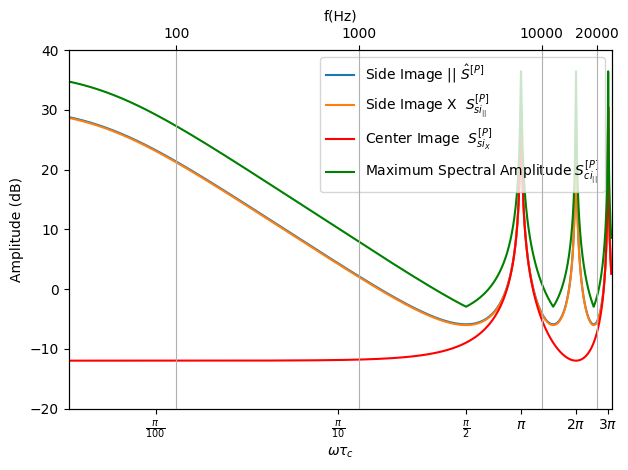

In [5]:
# Plotting
fig, ax1 = plt.subplots()


# Primary x-axis (w*tc)
ax1.plot(w * tc, 20 * np.log10(S_si_ipsi),  label='Side Image || $\hat{S}^{[P]}$ ')
ax1.plot(w * tc, 20 * np.log10(S_si_cont),  label='Side Image X  $S^{[P]}_{{si}_{||}}$')
ax1.plot(w * tc, 20 * np.log10(S_ci), 'r',  label='Center Image  $S^{[P]}_{{si}_X}$')
ax1.plot(w * tc, 20 * np.log10(S_hat), 'g', label='Maximum Spectral Amplitude $S^{[P]}_{{ci}_{||}}$')
ax1.set_xlabel(r'$\omega \tau_c$')
ax1.set_xscale('log')
ax1.set_xlim(np.pi / 300, np.pi * np.pi)  # Set limits for primary x-axis
ax1.set_xticks([np.pi / 100, np.pi / 10, np.pi / 2, np.pi, 2 * np.pi, 3 * np.pi])
ax1.set_xticklabels([r'$\frac{\pi}{100}$', r'$\frac{\pi}{10}$', r'$\frac{\pi}{2}$', r'$\pi$', r'$2\pi$', r'$3\pi$'])
ax1.set_ylabel('Amplitude (dB)')
ax1.legend(loc='upper right')

# Calculate corresponding frequency ticks
freq_ticks = [100, 1000, 10000, 20000]
omega_tc_ticks = [2 * np.pi * f * tc for f in freq_ticks]

# Secondary x-axis (frequency f)
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())  # Align with primary x-axis
ax2.set_xscale('log')
ax2.set_xticks(omega_tc_ticks)  # Major ticks
ax2.set_xticklabels([str(f) for f in freq_ticks])
ax2.set_xlabel('f(Hz)')

# Remove minor ticks on ax1 x-axes
ax1.tick_params(axis='x', which='minor', bottom=False)
ax2.tick_params(axis='x', which='minor', top=False)

plt.grid()
plt.ylim(-20, 40)
plt.tight_layout()
plt.show()